# Power Series
### Olivier Pauluis
We look here at power series solutions to second order ODE. 

In [1]:
# Import required libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

from IPython.display import display, HTML

## Convergence of power series 
When we use a power series such as 
$$ y(t) = \sum_{n=0}^\infty a_n t^n $$
the first question to aks is where does it converges. We typically want to determine the range of $t$ for which the series converged, typically by estimating the *radius of convergence*. 

For example, if we take the function 
$$ f(t) = \frac{1}{1+t} = \sum_{n=0}^\infty (-1)^n t^n, $$
you can apply the Cauchy test to determine that the radius of convergence should be 1. 

Let's check this out numerically. We'll use a built-in numpy library `polynomial`, allowing you to evaluate a polynomial of various orders. (You can use `help(np.polynomial')` to get more information on how to call the function.)


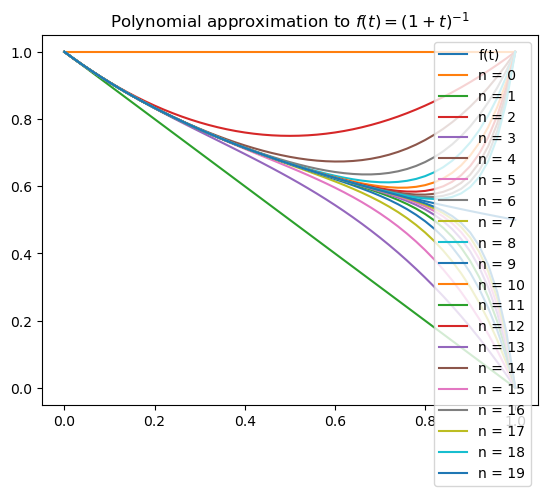

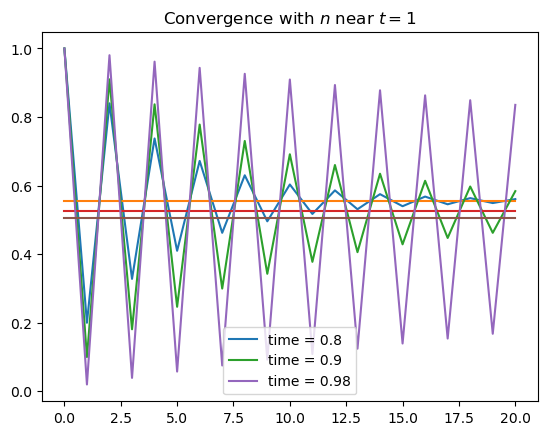

In [2]:
import numpy.polynomial as poly

nmax = 21
an = np.zeros( 21 )
for i in range(nmax):
    an[i] = (-1)**i
#We first evaluate between 0 and 1,
time = np.arange(0,1.02,0.02)
plt.plot(time,1/(1+time),label ='f(t)')
approx = np.zeros((len(time),nmax))

for n in range(nmax):
    approx[:,n] = poly.polynomial.polyval(time,an[:n+1])
                                     
for n in range(0,20):
    plt.plot(time,approx[:,n],label = 'n = '+str(n))
plt.legend()
plt.title('Polynomial approximation to $f(t) = (1+t)^{-1}$')
plt.show()

plt.figure()
time_idx = [-11,-6,-2]
for i in time_idx:
    plt.plot(approx[i,:],label = 'time = '+ str(time[i]))
    plt.plot(np.arange(0,nmax),0 * np.arange(0,nmax) + 1/(1+ time[i]))
plt.legend()
plt.title('Convergence with $n$ near $t=1$')
plt.show()


Note that the convergence is pretty good near 0 - a few terms in the sequence are enough to give very high accuraccy. However, when we try to evaluate something close to the radius of convergence ($1$ here), we need to include a lot of terms to even get a single digit of accuraccy. 

# Power series solution to ODE
We look at the solution of the ODE:

$$ \ddot y + \frac{3t}{1+t^2}\dot y + \frac{1}{1+t^2}y = 0. $$

This is the example 2 in section 8 of *Braun*.

Solving for the power series yields a recurrence relationship:
$$a_{n+2} = -\frac{n+1}{n+2} a_n$$
To initiate the series, we need to provide $a_0$ and $a_1$, which is equivalent to specifying the initial conditions 
$$y(0) = a_0$$
$$\dot y(0) = a_1$$
Let's now compute the power series and compare it to the numerical solution.

[ 0.          1.         -0.         -0.66666667  0.          0.53333333
 -0.         -0.45714286  0.          0.40634921 -0.         -0.36940837
  0.          0.34099234 -0.         -0.31825952  0.          0.29953837
 -0.         -0.28377319  0.        ]


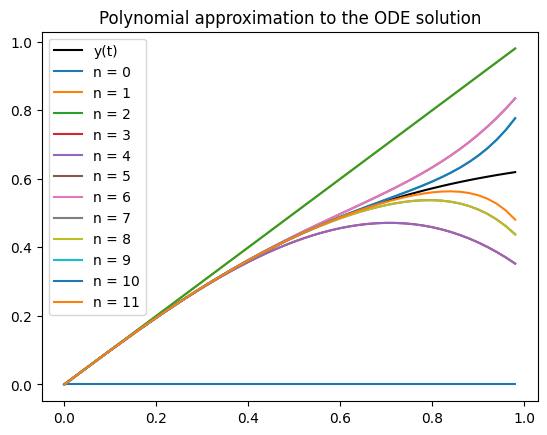

In [3]:
nmax = 21
an = np.zeros( nmax )
#set the initial conditions, and the time series
y0 = np.array((0,1))
an[0] = y0[0]
an[1] = y0[1]
#compute the coefficient in the time series
for n in range(2,nmax):
    an[n] = (-1)*(n-1)/n *an[n-2]
print(an)

time = np.arange(0,1.0,0.02)
approx = np.zeros((len(time),nmax))

#estimate the time series
for n in range(nmax):
    approx[:,n] = poly.polynomial.polyval(time,an[:n+1])

#let's integrate the ODE numerically
def rhs(y,t):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - 3 * t / (1+t**2) * y[1] - y[0]/(1+t**2)
    return dydt

y = scipy.integrate.odeint(rhs, y0, time)

# and polt the solutions:
plt.plot(time,y[:,0],'k',label ='y(t)')
for n in range(0,12):
    plt.plot(time,approx[:,n],label = 'n = '+str(n))
plt.legend()
plt.title('Polynomial approximation to the ODE solution')
plt.show()

## Regular singular points
*Singular points* occur wherever one of the coefficient $p$ or $q$ of the ODE
$$\ddot y + p(t) \dot y + q(t) y = 0$$
blows up. We also distnguish between *regular singular points*, for which a solution can be obtained using a modifed power series, and *irregular singular points*, which are quite more messy and beyond the scope of this class.  


### Euler equation
The Euler equation is a second-order linear ODE:
$$ t^2 \ddot y + a t \dot y + b = 0.$$
It can be solved exactly, and its solution provides a good insight into how solutions of ODE have near singular points. 

To do so, we throw in the ansatz
$$y(t) = t^r$$ into the equation. This leads to a quadrative equation for r:
$$r^2 + (a-1) r + b =0$$.

### two real roots
In this case, we get two linerly independent solutions, 
$$y_1 = t^{r_1}$$
$$y_2 = t^{r_2}$$.

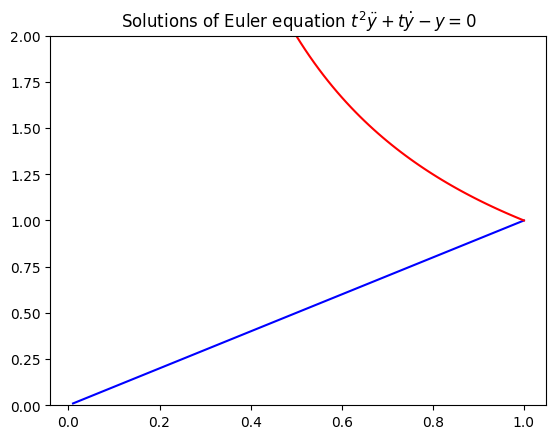

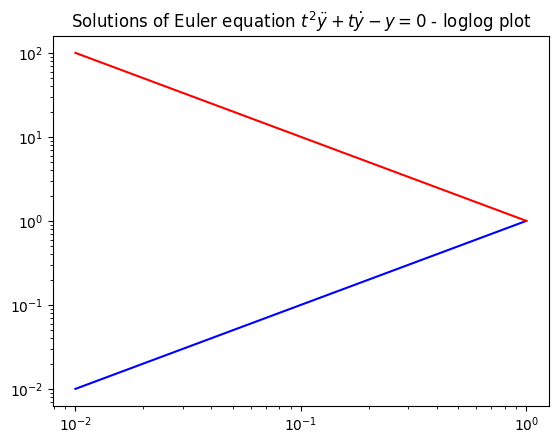

In [4]:
#let's integrate the ODE numerically
def Euler(y,t,a = 0, b = 0):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - a * y[1]/ t - b * y[0]/(t**2)
    return dydt
time = np.arange(1.0,0.0,-0.01)
# the case a =1, b= -1 yields r_1 =1 , r_2= -1
# We can get the propoer solution by carefully selecting the initial conditions
y0 = np.array((1,1))
y1 = scipy.integrate.odeint(Euler, y0, time, args = (1,-1))
y0 = np.array((1,-1))
y2 = scipy.integrate.odeint(Euler, y0, time, args = (1,-1))
plt.plot(time,y1[:,0],'b',label ='y_1(t)')
plt.plot(time,y2[:,0],'r',label ='y_2(t)')
plt.ylim(0,2)
plt.title('Solutions of Euler equation $t^2 \ddot y + t \dot y -y = 0$')
plt.show()
plt.title('Solutions of Euler equation $t^2 \ddot y + t \dot y -y = 0$ - loglog plot')
plt.loglog(time,y1[:,0],'b',label ='y_1(t)')
plt.loglog(time,y2[:,0],'r',label ='y_2(t)')
plt.show()

By plotting the solution in logaythmic cooridiante, we can easily identify the exponent of the power serie - it correesponds to the slope of the line as we have
$$ \ln y = r \ln t.$$

### double roots
In this case, we get two linearly independent solutions, 
$$y_1 = t^{r}$$
$$y_2 =  t^{r}\ln(t)$$.

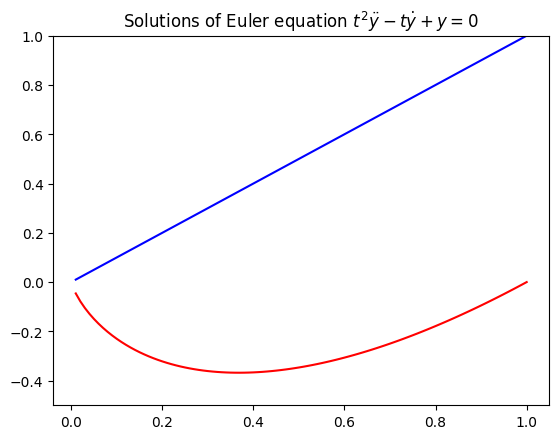

In [5]:
time = np.arange(1.0,0.0,-0.01)
# the case a = -1, b= 1 yields r_1 = r_2 = 1. 
# We can get the two solutions by carefully selecting the initial conditions
y0 = np.array((1,1))
y1 = scipy.integrate.odeint(Euler, y0, time, args = (-1,1))
y0 = np.array((0,1))
y2 = scipy.integrate.odeint(Euler, y0, time, args = (-1,1))
plt.plot(time,y1[:,0],'b',label ='y_1(t)')
plt.plot(time,y2[:,0],'r',label ='y_2(t)')
plt.ylim(-0.5,1)
plt.title('Solutions of Euler equation $t^2 \ddot y - t \dot y  + y = 0$')

plt.show()


### complex conjugate roots
For a pair of complex conjugate roots $r_1,r_2 = c \pm id$ 
$$y_1 = t^{c} \cos(d \ln t)$$
$$y_2 = t^{c} \sin(d \ln t)$$.

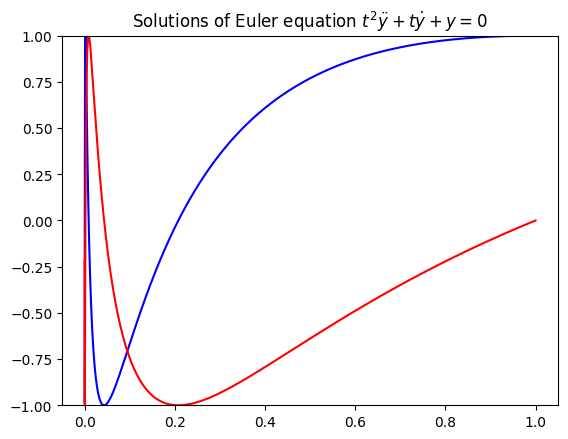

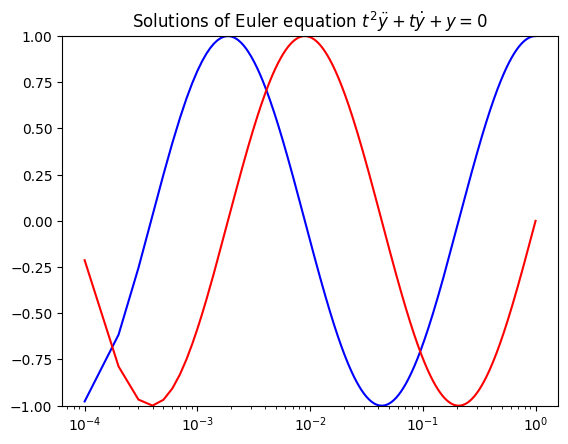

In [6]:
time = np.arange(1.0,0.0,-0.0001)
# the case a = 1, b= 1 yields r_1 = + i, r2 = -i 
# We can get the two solutions by carefully selecting the initial conditions
y0 = np.array((1,0))
y1 = scipy.integrate.odeint(Euler, y0, time, args = (1,1))
y0 = np.array((0,1))
y2 = scipy.integrate.odeint(Euler, y0, time, args = (1,1))
plt.title('Solutions of Euler equation $t^2 \ddot y + t \dot y +y = 0$')

plt.plot(time,y1[:,0],'b',label ='y_1(t)')
plt.plot(time,y2[:,0],'r',label ='y_2(t)')
plt.ylim(-1,1)
plt.show()
plt.semilogx(time,y1[:,0],'b',label ='y_1(t)')
plt.semilogx(time,y2[:,0],'r',label ='y_2(t)')
plt.ylim(-1,1)
plt.title('Solutions of Euler equation $t^2 \ddot y + t \dot y +y = 0$')
plt.show()

When plotted in log coordiante, $Re(t^i) = \cos (\ln t)$ looks like a sinusoidal function. Yhis also means that it has an infinite number of roots on the interval $(0;1]$, which do not really appear in a rugular plot. 

## Regular singular point
*Singular point* in a second order ODE occurs wherever the function $p(t)$ or $q(t)$ in the ODE
$$ \ddot y + p(t) \dot y + q(t) y = 0. $$
A singular point $t_0$ is a *regular singular point* if we have both
$$\lim_{t\rightarrow t_0} (t-t_0) p(t) = a$$ 
$$\lim_{t\rightarrow t_0} (t-t_0)^2 q(t) = b.$$
Near a regular singular point, the solution of the ODE can be approximated by solutions of the corresponding Euler equation:
$$ (t-t_0)^2 \ddot y + a (t-t_0) \dot y + b = 0.$$
The Frobenius method can be used to obtain solutions of an ODE near a regular singular point. 

We reproduce here the solution to the exmaple 5 in section 2.8.2 of *Braun*. The ODE
$$4 t \ddot y + 3 \dot y + 3 y = 0 $$
has a regular singular point at $t = 0$. The corresponding Euler euqation is
$$ t^2 \ddot y + \frac{3}{4} \dot y  = 0.$$
This Euler euqation has two linearly independent solution of the form:
$$ y_1(t) = C $$
$$ y_2(t) = t^{1/4}.$$

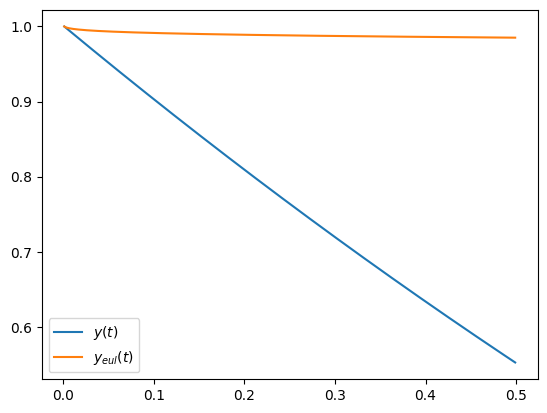

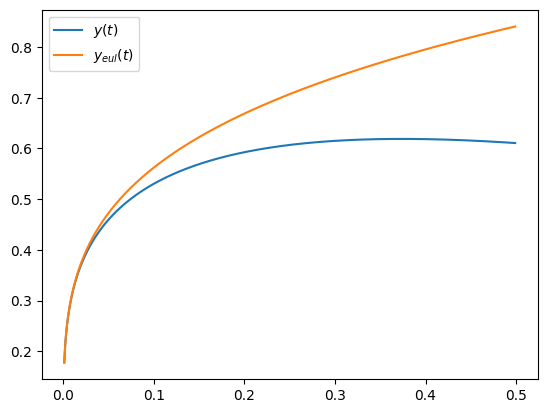

In [7]:

time = np.arange(0.001,.5,0.001)


#let's integrate the ODE numerically
def rhs(y,t):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - 0.75 /t * y[1] - 0.75 * y[0]/(t)
    return dydt

y0 = np.array((1,-1))
y = scipy.integrate.odeint(rhs, y0, time)
y_eul = scipy.integrate.odeint(Euler, y0, time, args = (0.75,0))
# and polt the solutions:
plt.plot(time,y[:,0],label ='$y(t)$')
plt.plot(time,y_eul[:,0],label ='$y_{eul}(t)$')
plt.legend()
plt.show()
y0 = np.array((time[0]**(0.25),0.25 * time[0]**(-0.75)))
y = scipy.integrate.odeint(rhs, y0, time)
y_eul = scipy.integrate.odeint(Euler, y0, time, args = (0.75,0))
# and polt the solutions:
plt.plot(time,y[:,0],label ='$y(t)$')
plt.plot(time,y_eul[:,0],label ='$y_{eul}(t)$')
plt.legend()
plt.show()

The Frobenius method obtains solutions to this ODE of the form
$$ y(t) = t^r \sum_{n=0}^\infty a_n t^n.$$
The coefficients $a_n$ can be derived from a recurrence relationship. For the ODE above, we get a first solution
of the form
$$ y_1(t) = \sum_{n=0}^\infty a_n t^n,$$
with 
$$ a_{n} = -\frac{3}{n(4n-1)} a_{n-1}.$$
The second solution is 
$$ y_2(t) = t^{-1/4}\sum_{n=0}^\infty b_n t^{n},$$
with 
$$ b_{n} = -\frac{3}{n(4n+1)} b_{n-1}.$$


[ 1.00000000e+00 -1.00000000e+00  2.14285714e-01 -1.94805195e-02
  9.74025974e-04 -3.07587150e-05  6.68667717e-07 -1.06137733e-08
  1.28392419e-10 -1.22278494e-12  9.40603800e-15 -5.96577463e-17
  3.17328438e-19 -1.43587528e-21  5.59431929e-24 -1.89637942e-26
  5.64398637e-29 -1.48656357e-31  3.48958585e-34 -7.34649654e-37]
[ 1.00000000e+00 -6.00000000e-01  1.00000000e-01 -7.69230769e-03
  3.39366516e-04 -9.69618617e-06  1.93923723e-07 -2.86586783e-09
  3.25666799e-11 -2.93393513e-13  2.14678180e-15 -1.30107988e-17
  6.63816265e-20 -2.89034658e-22  1.08659646e-24 -3.56261134e-27
  1.02767635e-29 -2.62832826e-32  6.00074945e-35 -1.23050228e-37]


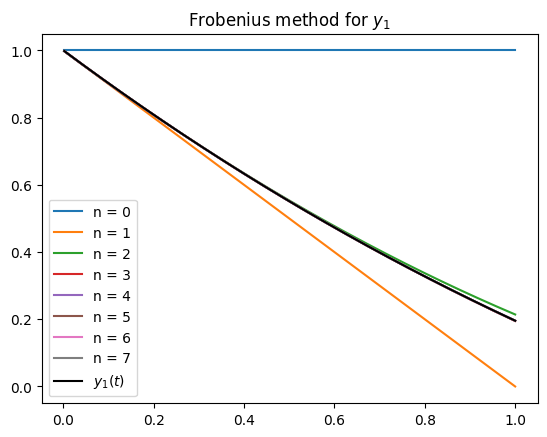

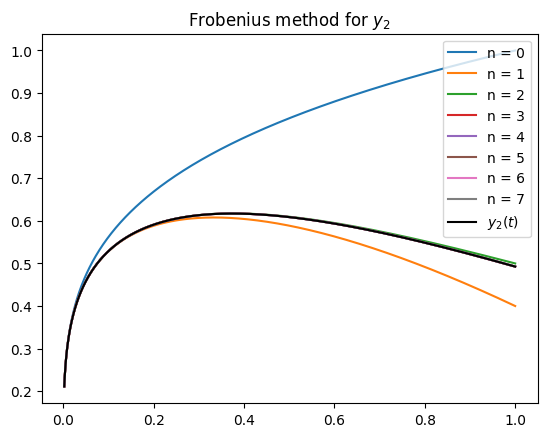

In [8]:
nmax = 20
an = np.zeros( nmax )
#set the initial conditions, and the time series
an[0] = 1
#compute the coefficient in the time series
for n in range(1,nmax):
    an[n] = (-3)/(4*n-1)/n *an[n-1]
print(an)

time = np.arange(1.0,.001,-0.001)
y1_approx = np.zeros((len(time),nmax))

#estimate the time series
for n in range(nmax):
    y1_approx[:,n] = poly.polynomial.polyval(time,an[:n+1])

bn = np.zeros( nmax )
#set the initial conditions, and the time series
bn[0] = 1
#compute the coefficient in the time series
for n in range(1,nmax):
    bn[n] = (-3)/(4*n+1)/n *bn[n-1]
print(bn)

y2_approx = np.zeros((len(time),nmax))

#estimate the time series
for n in range(nmax):
    y2_approx[:,n] = time**(0.25) * poly.polynomial.polyval(time,bn[:n+1])

y00 = y1_approx[0,-1]
y01 = (y1_approx[1,-1] - y1_approx[0,-1]) / (time[1] - time[0])
y0 = np.array( (y00,y01))
y = scipy.integrate.odeint(rhs, y0, time)

# and polt the solutions:
for n in range(0,8):
    plt.plot(time,y1_approx[:,n],label = 'n = '+str(n))
plt.plot(time,y[:,0],'k',label ='$y_1(t)$')

plt.legend()
plt.title('Frobenius method for $y_1$')
plt.show()

y00 = y2_approx[0,-1]
y01 = (y2_approx[1,-1] - y2_approx[0,-1]) / (time[1] - time[0])
y0 = np.array( (y00,y01))
y = scipy.integrate.odeint(rhs, y0, time)

# and polt the solutions:
for n in range(0,8):
    plt.plot(time,y2_approx[:,n],label = 'n = '+str(n))
plt.plot(time,y[:,0],'k',label ='$y_2(t)$')

plt.legend()
plt.title('Frobenius method for $y_2$')
plt.show()
